In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


In [57]:
df = pd.read_csv('/kaggle/input/netflix-stock-price-prediction/NFLX.csv')

In [27]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [28]:
df.shape

(1009, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


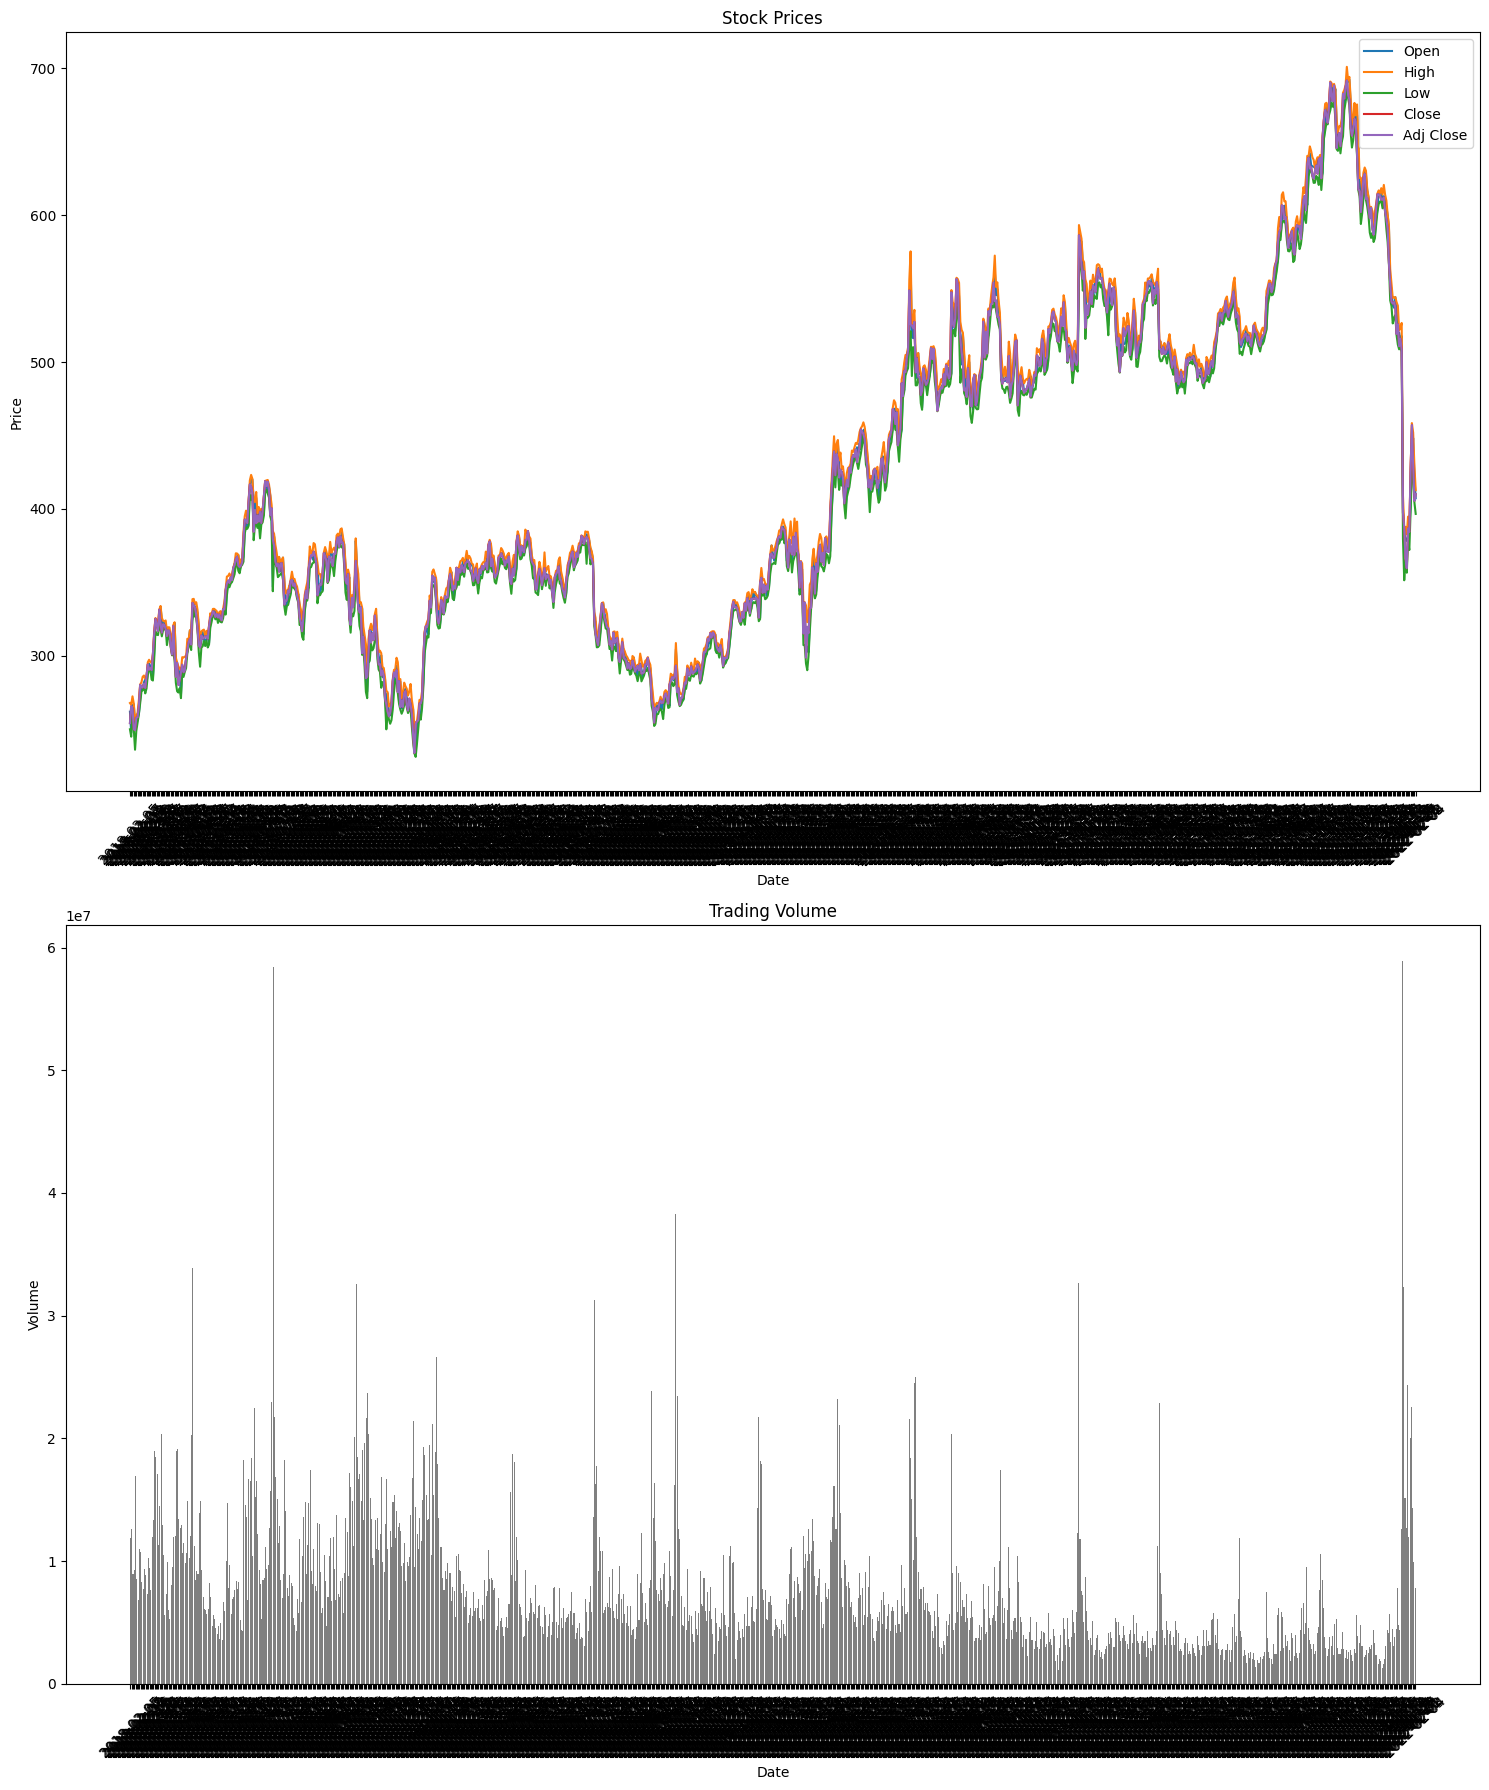

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(15, 18))

ax[0].plot(df['Date'], df['Open'], label='Open')
ax[0].plot(df['Date'], df['High'], label='High')
ax[0].plot(df['Date'], df['Low'], label='Low')
ax[0].plot(df['Date'], df['Close'], label='Close')
ax[0].plot(df['Date'], df['Adj Close'], label='Adj Close')
ax[0].set_title('Stock Prices')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()


ax[1].bar(df['Date'], df['Volume'], color='gray')
ax[1].set_title('Trading Volume')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume')


for axis in ax:
    for label in axis.get_xticklabels():
        label.set_rotation(45)

# Show the plot
plt.tight_layout()
plt.show()


In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


## convert  date to ordinal

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

In [34]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_ordinal
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,736730
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,736731
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,736732
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,736733
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,736734


In [42]:
df = df.drop(columns = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date_ordinal
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,736730
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,736731
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,736732
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,736733
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,736734


In [43]:
columns = df.columns.tolist()

columns = [columns[-1]] + columns[:-1]

df = df[columns]

df.head()

,Date_ordinal,Open,High,Low,Close,Adj Close,Volume
0,736730,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,736731,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,736732,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,736733,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,736734,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


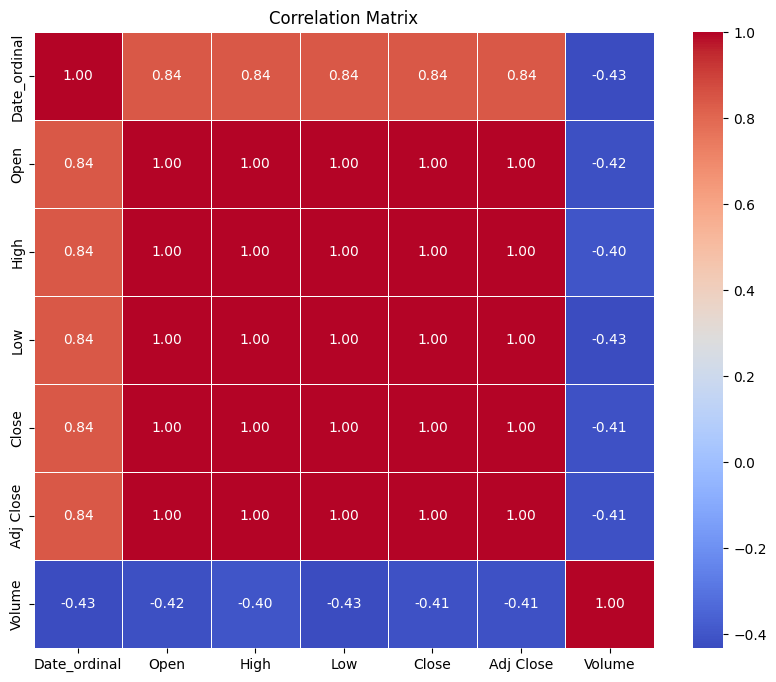

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

## normalize data

In [59]:
from sklearn.preprocessing import MinMaxScaler


features = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
date_ordinal = df[['Date_ordinal']]

# Normalize the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)



In [60]:
import numpy as np

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length, 3]  # Assuming we want to predict the 'Close' price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Set the sequence length
SEQ_LENGTH = 50

# Create sequences
X, y = create_sequences(scaled_features, SEQ_LENGTH)


In [61]:
# split and train

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0560 - val_loss: 0.0098
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0054 - val_loss: 0.0071
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0040 - val_loss: 0.0069
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0034 - val_loss: 0.0066
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0036 - val_loss: 0.0056
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0036 - val_loss: 0.0050
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0031 - val_loss: 0.0049
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0031 - val_loss: 0.0044
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0026 - val_loss: 0.0041
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0029 - val_loss: 0.0048
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0027 - val_l

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


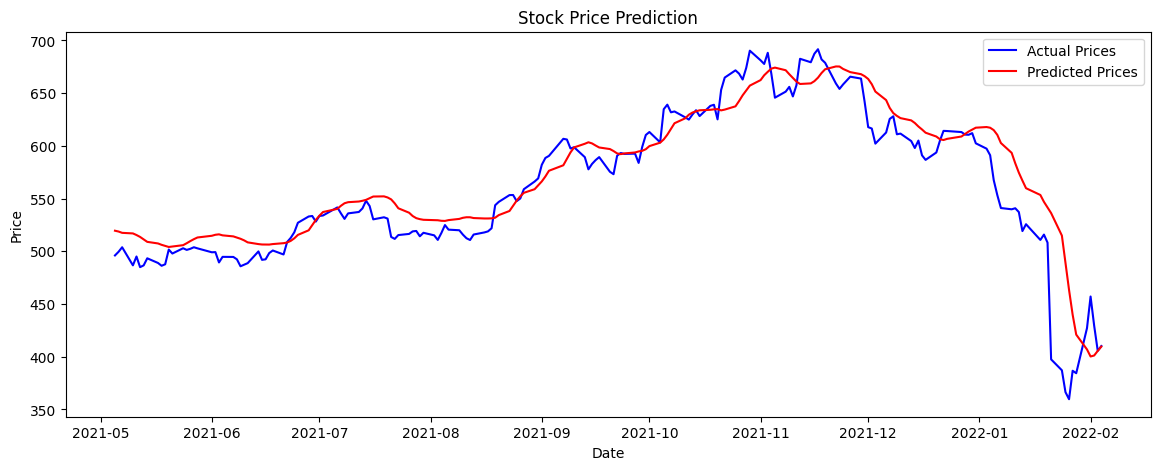

In [62]:

# Make predictions
predicted_scaled = model.predict(X_test)

# Initialize arrays for inverse transformation
predicted_prices = []
actual_prices = []

for i in range(len(predicted_scaled)):
    # Append the prediction to a dummy array with the same structure as the scaler expects
    dummy_predicted = np.zeros((1, scaled_features.shape[1]))
    dummy_predicted[:, 3] = predicted_scaled[i]
    inverted_predicted = scaler.inverse_transform(dummy_predicted)
    predicted_prices.append(inverted_predicted[0, 3])
    
    # Append the actual value to a dummy array for comparison
    dummy_actual = np.zeros((1, scaled_features.shape[1]))
    dummy_actual[:, 3] = y_test[i]
    inverted_actual = scaler.inverse_transform(dummy_actual)
    actual_prices.append(inverted_actual[0, 3])

predicted_prices = np.array(predicted_prices)
actual_prices = np.array(actual_prices)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df['Date'].values[split_index + SEQ_LENGTH:], actual_prices, color='blue', label='Actual Prices')
plt.plot(df['Date'].values[split_index + SEQ_LENGTH:], predicted_prices, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()
